In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

sns.set(rc={'figure.figsize':(11,7)})


def simulate_throwing_n_dice(n_dice, t_throws):
    throws = np.random.randint(1,7, size = (t_throws, n_dice))
    sum_throws = throws.sum(axis = 1)
    return sum_throws


def non_present_values(sum_throws, n_dice):
    sorted_elements = sorted(set(sum_throws))
    min_number = n_dice
    max_number = n_dice*6

    non_present = []
    for n in range(min_number, max_number + 1):
        if n not in sorted_elements:
            non_present.append(n)
    return non_present


def generate_plots(n_dice_list, t_throws_list, plot_type = "prob", make_gif = True, path = "png/medium/"):
    """If plot type = prob, plots generated show the probability distribution, if freq, show the count of the occurence"""
    
    png_files = []
    
    if plot_type not in ["prob", "freq"]:
        raise Exception("""plot_type not in ["prob", "freq"]""")
    
    for t_throws in tqdm(t_throws_list):
        for n_dice in n_dice_list:
            sum_throws = simulate_throwing_n_dice(n_dice, t_throws)
            if plot_type == "prob":
                stat = "probability"
            else:
                stat = "count"
            title = f"Distribution of the sum of {n_dice} dice thrown {t_throws:,} times"
            t_throws_str = str(t_throws).rjust(7,"0")
            n_dice_str = str(n_dice).rjust(2,"0")
            file_name = f"n={n_dice_str}_t={t_throws_str}_{plot_type}.png"
            png_files.append(file_name)
            g = sns.histplot(sum_throws, binwidth = 1, stat = stat, binrange = (n_dice, n_dice*6 + 1) )
            g.set_xticklabels(range(n_dice, 6*n_dice + 1))
            g.set(
                xlabel=f'Sum of {n_dice} dice',
                ylabel = f'Ocurrence')
            if plot_type == "prob":
                g.set(
                    #ylim=(0, 0.4),
                    ylabel = f'Probability')
                
            g.get_figure().savefig(f"{path}{file_name}")
            plt.clf()
    gif_name = f"n=({min(n_dice_list)},{max(n_dice_list)})_t=({min(t_throws_list)},{max(t_throws_list)})_{plot_type}"
    if make_gif:
        gif_name = f"{path}{gif_name}.gif"
        generate_gif(png_files, gif_name, True)
        png_files.append(gif_name)
    return png_files
        
            
            
import imageio, os
def generate_gif(files, gif_name, sort = False, duration = 0.8, path = "png/medium/"):
    if sort:
        files = sorted(files)
    images = []
    for filename in files:
        if filename.endswith(".png"):
            images.append(imageio.imread(f"{path}{filename}"))
    imageio.mimsave(gif_name, images,  duration=duration)
    return 

from IPython.display import Image, display
def plot_gif(gif):
    with open(gif,'rb') as f:
        display(Image(data=f.read(), format='png'))

In [83]:
t = np.array([10**i for i in range(2,7)])
t = np.append(t, t/2).astype(int)
t.sort()
print(t)

[     50     100     500    1000    5000   10000   50000  100000  500000
 1000000]


In [183]:
files = generate_plots([2],t)

100%|██████████| 10/10 [00:02<00:00,  4.44it/s]


<Figure size 792x504 with 0 Axes>

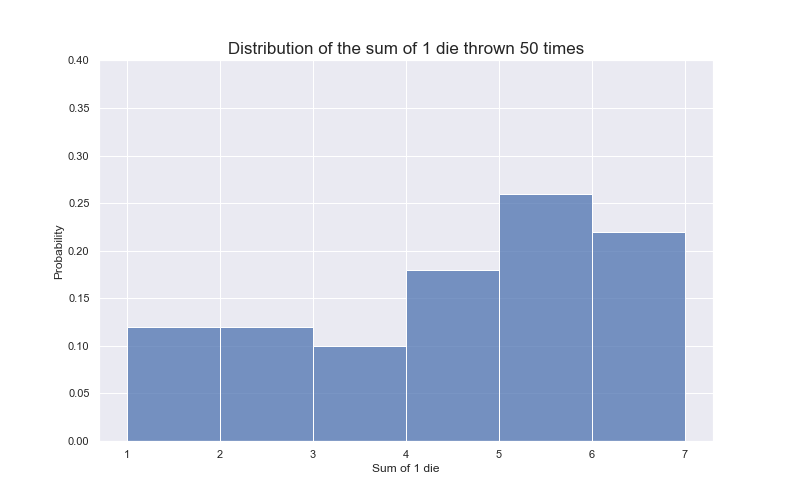

In [179]:
plot_gif(files[-1])

In [224]:
n = np.arange(1,15)
print(n)
files = generate_plots(n, [1_000_000])


  0%|          | 0/1 [00:00<?, ?it/s]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]



100%|██████████| 1/1 [00:08<00:00,  8.89s/it]


<Figure size 792x504 with 0 Axes>

In [217]:
df = pd.DataFrame(columns = np.arange(1,7), index = np.arange(1,7))
df.rename_axis(index = "die 1", columns = "die_2", inplace = True)
for i, row in df.iterrows():
    df.loc[i] = row.index.values + i

In [219]:
def color_negative_red(val):
    color = 'red' if val == 7 else 'black'
    return 'color: %s' % color
df.style.applymap(color_negative_red)    

die_2,1,2,3,4,5,6
die 1,,,,,,
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [80]:
t_throws = 10
n_dice = 5
throws = np.random.randint(1,7, size = (t_throws, n_dice))
df = pd.DataFrame(throws)
df.columns = [f"die {i}" for i in range(1, n_dice + 1)]
df["sum"] = df.sum(axis =1)
df.index = range(1,t_throws + 1)
df = df.rename_axis(index = "throw")
df

,die 1,die 2,die 3,die 4,die 5,sum
throw,,,,,,
1,2,3,5,1,4,15
2,5,3,6,4,2,20
3,1,5,4,5,6,21
4,6,4,1,4,3,18
5,6,1,4,6,4,21
6,2,2,3,1,2,10
7,1,3,2,3,3,12
8,3,3,6,3,4,19
9,5,4,3,1,5,18


In [ ]:
t_throws = 1_000_000
sum_throws_list = np.array([])
n_dice_list = np.arange(1,15)
for n_dice in n_dice_list:
    sum_throws = simulate_throwing_n_dice(n_dice, t_throws)
    sum_throws_list = np.append(sum_throws_list, sum_throws)
    
sns.histplot(sum_throws_list, binwidth = 1, stat = "probability", binrange = (1, n_dice_list.max()*6 + 1) )


In [3]:
n_dados_list = [1,2,5,10,15]
n_tiradas_por_dado = 10_000_000
n_tiradas_por_dado_list = [50, 100, 200, 500, 750, 1000,1250, 5000, 7500, 
                           10_000,50_000,100_000, 500_000, 1_000_000, 5_000_000]

In [39]:
stats = {}
n_dados_max = 16

n_dados_list = range(1,n_dados_max)
n_tiradas_por_dado_list = [100, 1_000_000]
for n_dados in n_dados_list:
    for n_tiradas_por_dado in n_tiradas_por_dado_list:
        suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
        stats[(n_dados, n_tiradas_por_dado)] = {"mean" : suma_dados.mean(), "std" : suma_dados.std(), "var" : suma_dados.var()}

df_stats = pd.DataFrame(stats).T

In [40]:
df_stats.index.set_names(["n_dados", "n_tiradas_por_dado"], inplace = True)
#df_stats.to_csv("stats_dados_2_precisiones.csv")

In [53]:
precise = df_stats.xs(1_000_000, level=1)

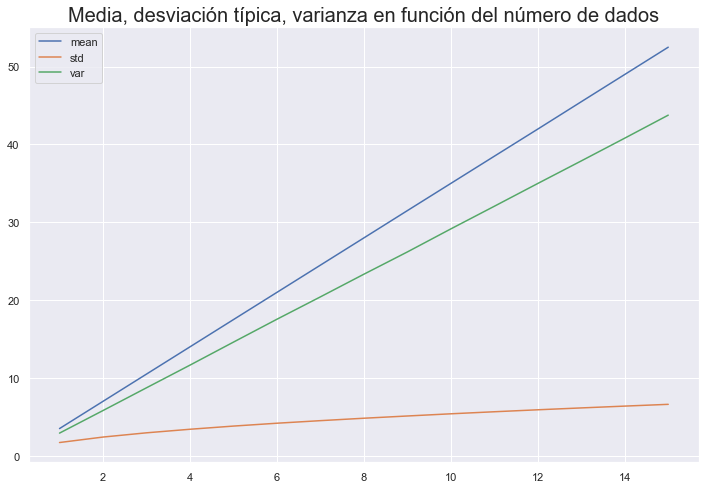

In [34]:
ax = precise.plot().set_title("Media, desviación típica, varianza en función del número de dados", size = 20)
fig = ax.get_figure()
fig.savefig('mean_std_var_n_dados_100.png')

In [57]:
!pwd

/Users/juanluisrto/Documents/Projects/central_limit_theorem_with_dice


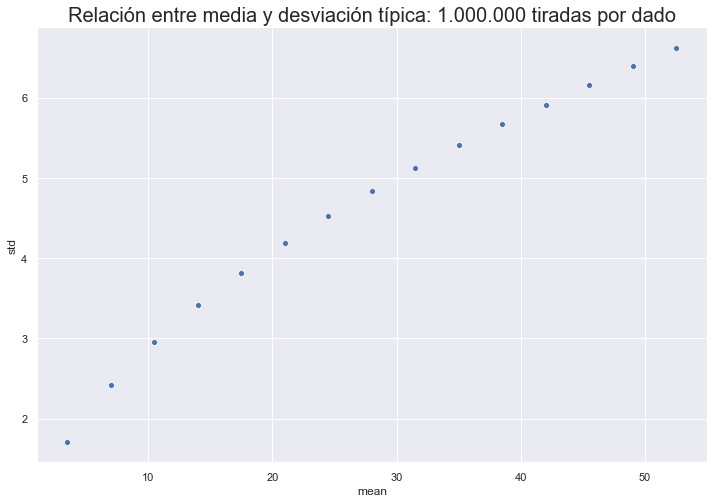

In [56]:
ax  = sns.scatterplot(precise["mean"],precise["std"] ).set_title("Relación entre media y desviación típica: 1.000.000 tiradas por dado", size = 20)
fig = ax.get_figure()
#fig.savefig('mean_vs_std_1_000_000.png')

In [179]:
n_dados = 15
for n_tiradas_por_dado in tqdm(n_tiradas_por_dado_list):
    suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
    title = f"Distribución de la suma de {n_dados} dados tirados {n_tiradas_por_dado:,} veces"
    n_tiradas_str = str(n_tiradas_por_dado).rjust(7,"0")
    file_name = f"n_tiradas={n_tiradas_str}.png"
    g = sns.histplot(suma_dados, binwidth = 1, binrange = (n_dados, n_dados*6 + 1) )
    g.set_title(title, size = 20)
    g.set(
        xlabel=f'Suma de los {n_dados} dados',
        ylabel = f'Veces que la suma aparece')
    g.get_figure().savefig(f"png/{file_name}")
    plt.clf()

100%|██████████| 15/15 [00:06<00:00,  2.19it/s]


<Figure size 864x576 with 0 Axes>

Probabilidad de que salgan todos los dados = 3

In [247]:
n_dados = 10
no_presentes_dict = {}
for n_tiradas_por_dado in tqdm(n_tiradas_por_dado_list):
    suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
    no_presentes = elementos_no_presentes(suma_dados, n_dados)
    no_presentes_dict[n_tiradas_por_dado] = no_presentes

100%|██████████| 15/15 [00:01<00:00, 10.00it/s]


In [184]:
import pandas as pd

In [248]:
unique_numbers = set()
for lists in no_presentes_dict.values():
    for number in lists:
        unique_numbers.add(number)
    

In [262]:
table = pd.DataFrame(columns = unique_numbers, index = no_presentes_dict.keys()).T
for key, value in no_presentes_dict.items():
    for v in value:
        table.loc[v,key] = True
    print(f"{key} veces ", value)

50 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
100 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
200 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
500 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60]
750 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60]
1000 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
1250 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 51, 54, 55, 56, 57, 58, 59, 60]
5000 veces  [10, 11, 12, 13, 14, 15, 16, 55, 56, 57, 58, 59, 60]
7500 veces  [10, 11, 12, 13, 14, 15, 16, 55, 57, 58, 59, 60]
10000 veces  [10, 11, 12, 13, 14, 55, 57, 58, 59, 60]
50000 veces  [10, 11, 12, 14, 55, 56, 57, 58, 59, 60]
100000 veces  [10, 11, 12, 13

In [263]:
table.fillna(value = False, inplace=True)

In [257]:
def highlight_true(s):
    if s:
        return 'background-color: green'
    else:
        return 'background-color: red'
        


In [285]:
inverse = ~table
inverse_style = inverse.style.applymap(highlight_true)

In [291]:
inverse_style.index.name = "Suma de 10 dados"

In [295]:
print("Número de veces que tiramos 10 dados")
inverse_style

Número de veces que tiramos 10 dados


,50,100,200,500,750,1000,1250,5000,7500,10000,50000,100000,500000,1000000,5000000
Suma de 10 dados,,,,,,,,,,,,,,,
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
13,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
14,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
15,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
17,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
18,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True


In [284]:
type(inverse)

pandas.io.formats.style.Styler

In [268]:
m_index = pd.MultiIndex.from_tuples(map(lambda x: ('E', x), inverse.columns))

In [272]:
m_index

MultiIndex([('E',      50),
            ('E',     100),
            ('E',     200),
            ('E',     500),
            ('E',     750),
            ('E',    1000),
            ('E',    1250),
            ('E',    5000),
            ('E',    7500),
            ('E',   10000),
            ('E',   50000),
            ('E',  100000),
            ('E',  500000),
            ('E', 1000000),
            ('E', 5000000)],
           )

In [270]:
inverse.columns = m_index

In [180]:
import imageio, os
images = []
filenames =sorted([filename for filename in os.listdir("./png/")])
for filename in filenames:
    if filename.endswith(".png"):
        images.append(imageio.imread(f"png/{filename}"))
imageio.mimsave("png/distribution_tiradas.gif", images,  duration=0.5)

# Combinatorics



$$
P(s,n) = \frac{1}{6^n}\sum_{k=0}^{(s-n)/6}(-1)^k\binom{n}{k}\binom{s-6k-1}{n-1}
$$


comprobar si esa ecuación tiende a la normal con media 3.5 y varianza v cuando n -> inf .... prob [s,s+1)

In [562]:
(sum_throws == 30).sum()

484251

In [715]:
s = 30
n = 10
p_exp   = prob_of_sum_experimental(s,n, throws = 1_000_000)
p_comb  = prob_of_sum_combinatorics(s,n)
p_gauss = prob_of_sum_gaussian(s, n)
print(p_exp)
print(p_comb)
print(p_gauss)

0.048663
0.048464367913724195
0.04812164446903665


In [718]:
def coef_gauss(n):
    return np.divide(1,6**n)
def coef_comb(n):
    return np.divide(1,np.sqrt(n*2*np.pi*105/36))

In [738]:
t = 10
coef_comb(t)/coef_gauss(t)


4466621.689681975

In [582]:

sum_throws = simulate_throwing_n_dice(10, 1_000_000)

In [706]:
import statistics as stats
def prob_of_sum_gaussian(s,n):
    mean = 3.5*n
    std = np.sqrt(n*105/36)
    normal_dist = stats.NormalDist(mean, std)
    return normal_dist.pdf(s)

In [574]:
def prob_of_sum_experimental(s,n, throws = 1_000_000):
    sum_throws = simulate_throwing_n_dice(n, throws)
    return np.divide((sum_throws == s).sum(),throws)

In [652]:
def prob_of_sum_combinatorics(s,n):
    prob = 0
    k = np.floor((s - n)/6).astype(int)
    for i in range(0,k + 1):
        prob += (-1)**(i) * math.comb(n,i) * math.comb(s - 6*i - 1,n - 1)
    return np.divide(prob,6**n)
    

In [749]:
from math import factorial as fact

In [752]:
def iter_gauss(k, x):
    c = 1/np.sqrt(np.pi)
    num = (x - 7/2)**(2*k)
    den = (np.sqrt(2)*105/36)**(2*k+1)
    return c*num/den

def iter_comb(k, x, n = 10):
    c = 1/np.power(6,n)
    num = fact(x - 6*k - 1) * n
    den = fact(x - 6*k - n) * fact(n - k)
    return c*num/den

In [756]:
k = 10
x = 30
it_c = iter_comb(k,x)
it_g = iter_gauss(k,x)

In [757]:
print(it_c)
print(it_g)

0.036183865836000605
233.02342363544784


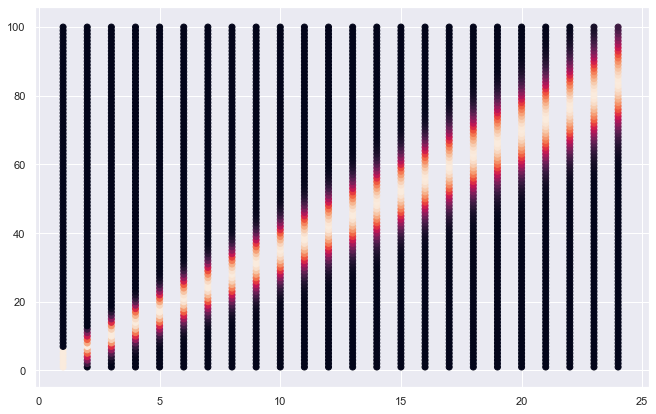

In [552]:
n,s = (24, 100)
s_array = np.arange(1,s + 1)
n_array = np.arange(1,n + 1)

s_n_dict = {}
for s in s_array:
    s_dict = {}
    for n in n_array:
        p = prob_of_sum_combinatorics(s,n)
        s_dict[n] = p
    s_n_dict[s] = s_dict

df = pd.DataFrame(s_n_dict)
for i in range(1,n+1):
    index = i * np.ones(s)
    plt.scatter(index, df.columns.values, c= df.loc[i])
    

In [539]:
vals = []
for i in range(1,200):
    p = prob_sum(i,i)
    vals.append(p)

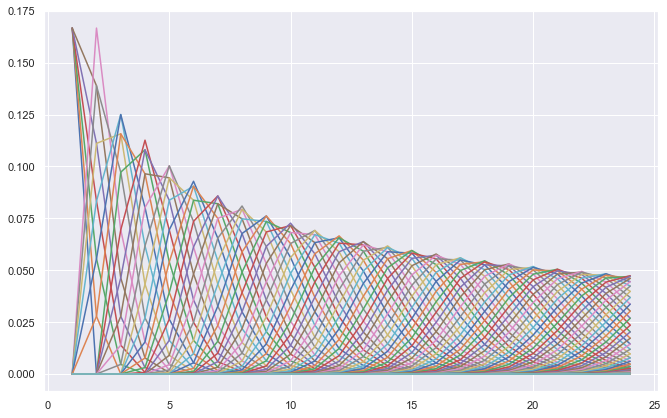

In [536]:
df.plot(legend = False)